In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MEPS_DATA.csv')


In [ ]:
nullvalues=data.isnull().sum() # View the first few rows
nullvalues

YEAR           0
PERNUM         0
DUID           0
PID            0
MEPSID         0
PANEL          0
PSUANN         0
STRATANN       0
PSUPLD         0
STRATAPLD      0
PANELYR        0
RELYR          0
PERWEIGHT      0
SAQWEIGHT      0
DIABWEIGHT     0
AGE            0
SEX            0
USBORN         0
HIDEG          0
WORKEV         0
INCWAGE        0
QINCWAGE       0
FOODSTYN       0
FILEDYN        0
HEALTH         0
CANCEREV       0
STROKEAGE      0
HEARTATTAGE    0
CNBLAD         0
DIAPILLS       0
AEFFORT        0
AHOPELESS      0
ANERVOUS       0
CHGTOT         0
ERTOTVIS       0
HPTOTDIS       0
DVEXPTOT       0
dtype: int64

In [ ]:
data.head() # View the first few rows

,YEAR,PERNUM,DUID,PID,MEPSID,PANEL,PSUANN,STRATANN,PSUPLD,STRATAPLD,...,HEARTATTAGE,CNBLAD,DIAPILLS,AEFFORT,AHOPELESS,ANERVOUS,CHGTOT,ERTOTVIS,HPTOTDIS,DVEXPTOT
0,2015,1,60001,101,1960001101,19,1,20151019,1,1019,...,46,0,2,0,0,1,53786,1,0,0
1,2015,2,60001,102,1960001102,19,1,20151019,1,1019,...,96,0,2,3,3,3,23845,2,0,0
2,2015,3,60001,103,1960001103,19,1,20151019,1,1019,...,96,0,0,0,1,1,0,0,0,0
3,2015,4,60001,104,1960001104,19,1,20151019,1,1019,...,96,0,0,1,1,2,3191,1,0,0
4,2015,5,60001,105,1960001105,19,1,20151019,1,1019,...,96,0,0,6,6,6,12921,0,1,0


In [ ]:
data.info()  # Display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217076 entries, 0 to 217075
Data columns (total 37 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   YEAR         217076 non-null  int64  
 1   PERNUM       217076 non-null  int64  
 2   DUID         217076 non-null  int64  
 3   PID          217076 non-null  int64  
 4   MEPSID       217076 non-null  int64  
 5   PANEL        217076 non-null  int64  
 6   PSUANN       217076 non-null  int64  
 7   STRATANN     217076 non-null  int64  
 8   PSUPLD       217076 non-null  int64  
 9   STRATAPLD    217076 non-null  int64  
 10  PANELYR      217076 non-null  int64  
 11  RELYR        217076 non-null  int64  
 12  PERWEIGHT    217076 non-null  float64
 13  SAQWEIGHT    217076 non-null  float64
 14  DIABWEIGHT   217076 non-null  float64
 15  AGE          217076 non-null  int64  
 16  SEX          217076 non-null  int64  
 17  USBORN       217076 non-null  int64  
 18  HIDEG        217076 non-

# Statical Analysis

In [ ]:
stats_age = data['AGE'].describe()
print("Summary statistics for AGE in MEPS DATA :")
stats_age

Summary statistics for AGE in MEPS DATA :


count    217076.000000
mean         45.978432
std          85.463489
min           0.000000
25%          18.000000
50%          38.000000
75%          59.000000
max         996.000000
Name: AGE, dtype: float64

In [ ]:
#number of individuals by gender(1-male, 2 -female)
gender_counts = data['SEX'].value_counts()
print("\nCount of individuals by gender:")
print(gender_counts)



Count of individuals by gender:
2    113437
1    103639
Name: SEX, dtype: int64


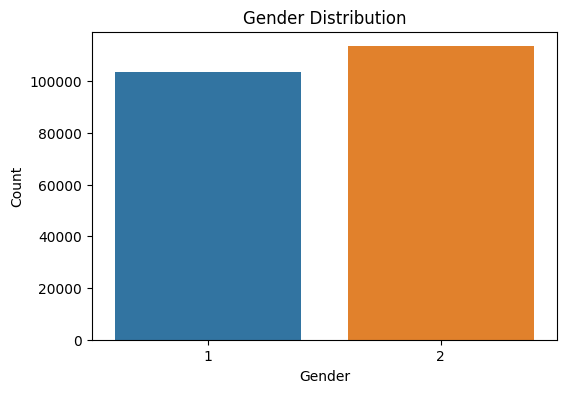

In [ ]:
# Create a bar chart for gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='SEX')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

In [ ]:
# Calculate the z-scores for the 'Age' column
z_scores = np.abs((data['AGE'] - data['AGE'].mean()) / data['AGE'].std())

# Define a threshold for what you consider an outlier (e.g., z-score > 3)
threshold = 3

# Create a boolean mask for the data without outliers
filtered_mask = z_scores < threshold

# Filter the DataFrame to get only the rows without outliers of age
cleaned_data = data[~outliers_mask]


print(cleaned_data)

        YEAR  PERNUM     DUID  PID      MEPSID  PANEL  PSUANN  STRATANN  \
0       2015       1    60001  101  1960001101     19       1  20151019   
1       2015       2    60001  102  1960001102     19       1  20151019   
2       2015       3    60001  103  1960001103     19       1  20151019   
3       2015       4    60001  104  1960001104     19       1  20151019   
4       2015       5    60001  105  1960001105     19       1  20151019   
...      ...     ...      ...  ...         ...    ...     ...       ...   
217071  2021       2  2689506  102  2689506102     26       2  20212049   
217072  2021       1  2689507  101  2689507101     26       2  20212104   
217073  2021       2  2689507  102  2689507102     26       2  20212104   
217074  2021       3  2689507  103  2689507103     26       2  20212104   
217075  2021       4  2689507  104  2689507104     26       2  20212104   

        PSUPLD  STRATAPLD  ...  HEARTATTAGE  CNBLAD  DIAPILLS  AEFFORT  \
0            1       1019

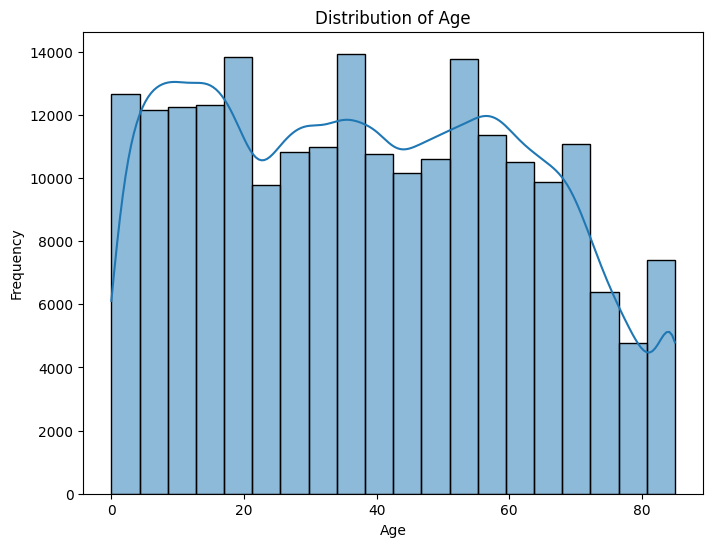

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_data['AGE'], bins=20, kde=True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

In [ ]:
# Average Age by Gender
pivot_table = cleaned_data.pivot_table(values='AGE', index='SEX', aggfunc='mean')
print("\nAverage Age by Gender:")
print(pivot_table)



Average Age by Gender:
           AGE
SEX           
1    37.587594
2    40.032665


<center>

# Health care annual expenditure analysis

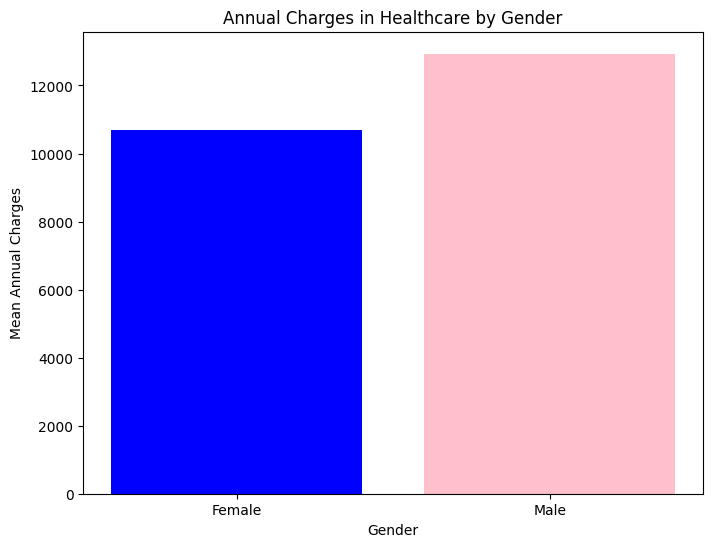

In [ ]:
# Group the data by 'Gender' and calculate the mean annual charges
gender_charges = cleaned_data.groupby('SEX')['CHGTOT'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(gender_charges.index, gender_charges.values, color = ['blue', 'pink'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Mean Annual Charges')
plt.title('Annual Charges in Healthcare by Gender')

plt.xticks(gender_charges.index, ['Female', 'Male'])

# Show the plot
plt.show()


In [ ]:
# Define age categories
bins = [0, 20, 30, 40, 50, 60, 70, 80, 120]

# Create labels for the age categories
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-120']

# Cut the data into age categories
cleaned_data['Age Category'] = pd.cut(cleaned_data['AGE'], bins=bins, labels=labels, right=False)

# Group the data by age category and calculate the mean annual charges
age_category_charges = cleaned_data.groupby('Age Category')['CHGTOT'].mean()

# Print or plot the results
print(age_category_charges)


Age Category
0-20       4156.119156
21-30      5500.655969
31-40      7126.328226
41-50      9077.533967
51-60     14562.897032
61-70     22428.533797
71-80     29125.650506
81-120    34340.335501
Name: CHGTOT, dtype: float64


<ipython-input-58-6883b3a8487e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Age Category'] = pd.cut(cleaned_data['AGE'], bins=bins, labels=labels, right=False)


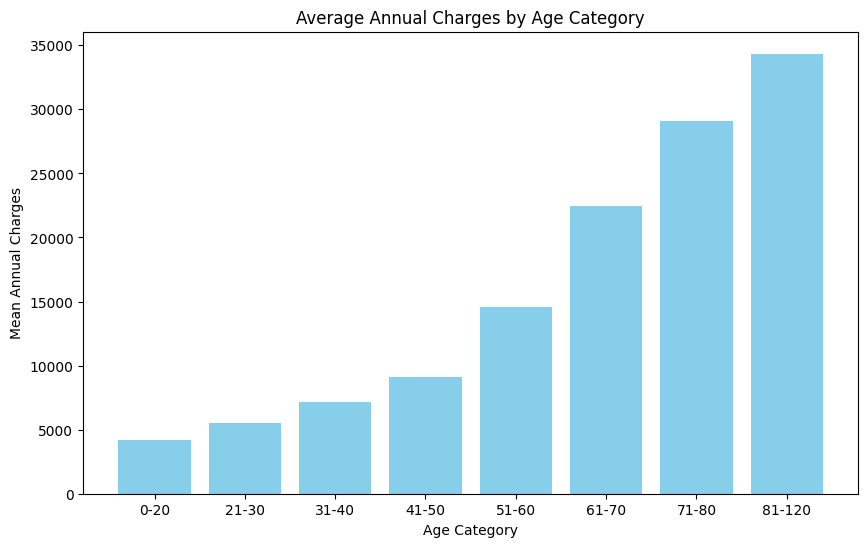

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_category_charges.index, age_category_charges.values, color='skyblue')

# Add labels and title
plt.xlabel('Age Category')
plt.ylabel('Mean Annual Charges')
plt.title('Average Annual Charges by Age Category')

# Show the plot
plt.show()


In [ ]:
# Create a new column 'Stroke Age Category' based on the 'STROKEAGE'
cleaned_data['first Stroke Age Category'] = pd.cut(cleaned_data['STROKEAGE'], bins=bins, labels=labels, right=False)
#Create a new column 'Heart attack, age at diagnosis' based on the 'STROKEAGE'
cleaned_data['Heart attack age at diagnosis'] = pd.cut(cleaned_data['HEARTATTAGE'], bins=bins, labels=labels, right=False)


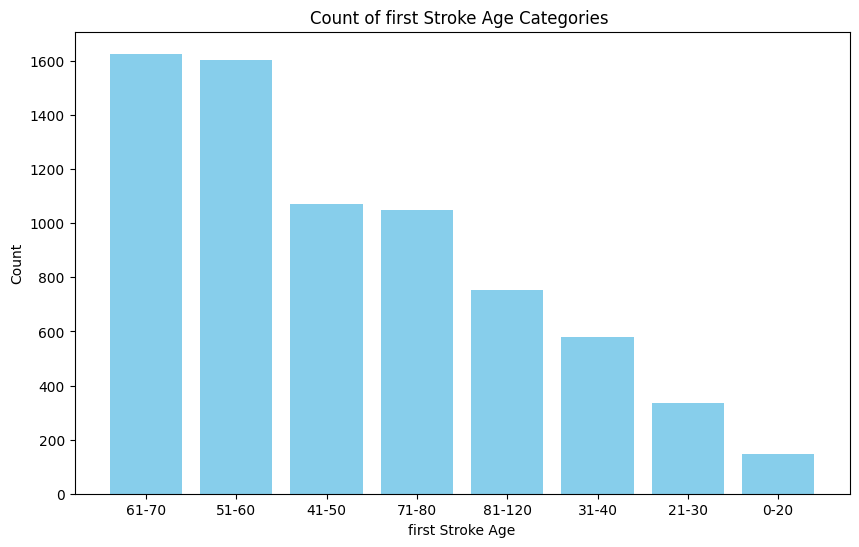

In [93]:
# Filter out rows where 'STROKEAGE' is not 0 which is null value
filtered_data =cleaned_data[cleaned_data['STROKEAGE'] != 0]

# Calculate the count of each category
category_counts = filtered_data['first Stroke Age Category'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('first Stroke Age')
plt.ylabel('Count')
plt.title('Count of first Stroke Age Categories ')

# Show the plot
plt.show()



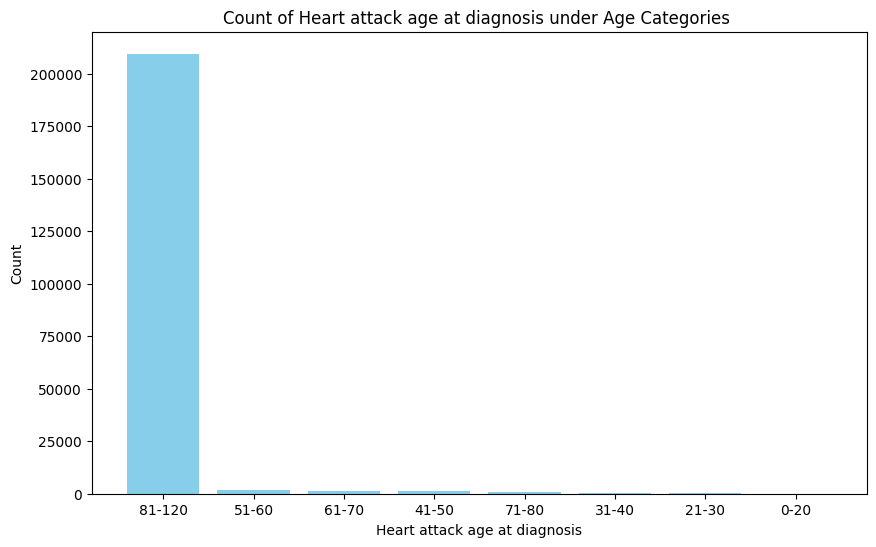

In [94]:
# Filter out rows where 'HEARTATTAGE ' is not 0 which is null value
filtered_data =cleaned_data[cleaned_data['HEARTATTAGE'] != 0]

# Calculate the count of each category
category_counts = filtered_data['Heart attack age at diagnosis'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Heart attack age at diagnosis')
plt.ylabel('Count')
plt.title('Count of Heart attack age at diagnosis under Age Categories ')

# Show the plot
plt.show()
